# Manipulating data and metadata in cf-python (version 2)

## Homepage: https://cfpython.bitbucket.io
## Online, searchable documenation: https://cfpython.bitbucket.io/docs/latest

## Contents:

### 1. Read, inspect, write netCDF files
### 2. Subspace
### 3. Data
### 4. Calculate statistics
### 5. Other file formats

#### Already using cf-python? https://cfpython.bitbucket.io/docs/latest/1_to_2_changes.html

In [1]:
import cf
cf.__version__

'2.1.1'

# 1. Read, inspect and write files
https://cfpython.bitbucket.io/docs/latest/generated/cf.read.html

https://cfpython.bitbucket.io/docs/latest/generated/cf.read_field.html

In [2]:
f = cf.read_field('ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc')

In [3]:
f

<CF Field: air_temperature(time(120), latitude(145), longitude(192)) K>

In [4]:
print f

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods   : time: mean (interval: 30 minutes)
Axes           : height(1) = [2.0] m
               : time(120) = [1959-12-16T12:00:00Z, ..., 1969-11-16T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east



In [5]:
f.dump()

----------------------------------
Field: air_temperature (ncvar%tas)
----------------------------------
CDI = 'Climate Data Interface version 1.7.0 (http://mpimet.mpg.de/cdi)'
CDO = 'Climate Data Operators version 1.7.0 (http://mpimet.mpg.de/cdo)'
associated_files = 'baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation
                    gridspecFile: gridspec_atmos_fx_IPSL-CM5A-
                    LR_historical_r0i0p0.nc areacella: areacella_fx_IPSL-CM5A-
                    LR_historical_r0i0p0.nc'
branch_time = 1850.0
cmor_version = '2.5.1'
comment = 'This 20th century simulation include natural and anthropogenic
           forcings.'
contact = 'ipsl-cmip5 _at_ ipsl.jussieu.fr Data manager : Sebastien Denvil'
creation_date = '2011-02-23T17:52:35Z'
experiment = 'historical'
experiment_id = 'historical'
forcing = 'Nat,Ant,GHG,SA,Oz,LU,SS,Ds,BC,MD,OC,AA'
frequency = 'mon'
history = "Thu May 26 15:47:13 2016: cdo mergetime /data/cr1/hadlg/helix/IPSL-
           CM5A-LR_rcp45_tmp_ou

### Properties

In [6]:
f.properties()

{'CDI': 'Climate Data Interface version 1.7.0 (http://mpimet.mpg.de/cdi)',
 'CDO': 'Climate Data Operators version 1.7.0 (http://mpimet.mpg.de/cdo)',
 'Conventions': 'CF-1.5',
 '_FillValue': 1.0000000200408773e+20,
 'associated_files': 'baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_IPSL-CM5A-LR_historical_r0i0p0.nc areacella: areacella_fx_IPSL-CM5A-LR_historical_r0i0p0.nc',
 'branch_time': 1850.0,
 'cmor_version': '2.5.1',
 'comment': 'This 20th century simulation include natural and anthropogenic forcings.',
 'contact': 'ipsl-cmip5 _at_ ipsl.jussieu.fr Data manager : Sebastien Denvil',
 'creation_date': '2011-02-23T17:52:35Z',
 'experiment': 'historical',
 'experiment_id': 'historical',
 'forcing': 'Nat,Ant,GHG,SA,Oz,LU,SS,Ds,BC,MD,OC,AA',
 'frequency': 'mon',
 'history': "Thu May 26 15:47:13 2016: cdo mergetime /data/cr1/hadlg/helix/IPSL-CM5A-LR_rcp45_tmp_output_1_hist.nc /data/cr1/hadlg/helix/IPSL-CM5A-LR_rcp45_tmp_output_1_fut.nc /data/cr1/h

In [7]:
f.getprop('project_id')

'CMIP5'

In [8]:
f.setprop('project_id', 'banana')
f.getprop('project_id')

'banana'

In [10]:
f.delprop('project_id')
f.getprop('project_id')

AttributeError: Can't delete non-existent Field CF property 'project_id'

### Shorthand for named CF properties
Those listed at http://cfconventions.org/Data/cf-conventions/cf-conventions-1.7/cf-conventions.html#attribute-appendix

In [12]:
print f.standard_name
f.standard_name = 'banana'
print f.standard_name
del f.standard_name
f.standard_name = 'air_temperature'
print f.standard_name

air_temperature
banana
air_temperature


### Reading many files

In [13]:
fl = cf.read('ncas_data/data[2-7].nc')
fl

[<CF Field: air_temperature(long_name:t(1), long_name:p(1), long_name:latitude(256), long_name:longitude(512)) K>,
 <CF Field: air_temperature(long_name:t(1), long_name:p(1), latitude(160), longitude(320)) K>,
 <CF Field: air_temperature(time(1680), latitude(73), longitude(96)) K>,
 <CF Field: eastward_wind(time(1), pressure(37), latitude(256), longitude(512)) m s**-1>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(36), longitude(48)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(36), longitude(48)) m s**-1>]

In [14]:
for x in fl:
    print 'NAME:', x.name(), 'SHAPE:', x.shape, 'UNITS:', x.units

NAME: air_temperature SHAPE: (1, 1, 256, 512) UNITS: K
NAME: air_temperature SHAPE: (1, 1, 160, 320) UNITS: K
NAME: air_temperature SHAPE: (1680, 73, 96) UNITS: K
NAME: eastward_wind SHAPE: (1, 37, 256, 512) UNITS: m s**-1
NAME: eastward_wind SHAPE: (1, 23, 160, 320) UNITS: m s**-1
NAME: eastward_wind SHAPE: (1, 23, 36, 48) UNITS: m s**-1
NAME: northward_wind SHAPE: (1, 23, 36, 48) UNITS: m s**-1


### Select by list position

In [15]:
g = fl[0]
g

<CF Field: air_temperature(long_name:t(1), long_name:p(1), long_name:latitude(256), long_name:longitude(512)) K>

In [17]:
fl[4:]

[<CF Field: eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(36), longitude(48)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(36), longitude(48)) m s**-1>]

### Select by metadata
https://cfpython.bitbucket.io/docs/latest/generated/cf.FieldList.select.html

In [18]:
fl.select('air_temperature')

[<CF Field: air_temperature(long_name:t(1), long_name:p(1), long_name:latitude(256), long_name:longitude(512)) K>,
 <CF Field: air_temperature(long_name:t(1), long_name:p(1), latitude(160), longitude(320)) K>,
 <CF Field: air_temperature(time(1680), latitude(73), longitude(96)) K>]

In [19]:
help(fl.select)

Help on method select in module cf.field:

select(self, description=None, items=None, rank=None, ndim=None, exact=False, match_and=True, inverse=False) method of cf.field.FieldList instance
    Return the fields that satisfy the given conditions.
    
    Different types of conditions may be set with the parameters:
             
    =============  =======================================================
    Parameter      What gets tested
    =============  =======================================================
    *description*  Field properties and attributes
                 
    *items*        Field domain items
             
    *rank*         The number of field domain axes
    
    *ndim*         The number of field data array axes
    =============  =======================================================
    
    By default, when multiple criteria are given the field matches if it
    satisfies the conditions given by each one.
    
    If no fields satisfy the conditions then

In [21]:
fl.select('northward_wind')[0]

<CF Field: northward_wind(time(1), pressure(23), latitude(36), longitude(48)) m s**-1>

In [22]:
fl.select({'units': 'km h-1'})

[<CF Field: eastward_wind(time(1), pressure(37), latitude(256), longitude(512)) m s**-1>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(36), longitude(48)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(36), longitude(48)) m s**-1>]

In [24]:
fl.select('(east|north)ward_wind')

[<CF Field: eastward_wind(time(1), pressure(37), latitude(256), longitude(512)) m s**-1>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(36), longitude(48)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(36), longitude(48)) m s**-1>]

# Write fields to a netCDF file
https://cfpython.bitbucket.io/docs/latest/generated/cf.write.html

In [25]:
cf.write(f, 'new_file.nc')

In [26]:
g = cf.read_field('new_file.nc')
f.equals(g)

True

# 2. Subspace a field

https://cfpython.bitbucket.io/docs/latest/generated/cf.Field.subspace.html

### Index-space: [square brackets]

In [27]:
f

<CF Field: air_temperature(time(120), latitude(145), longitude(192)) K>

In [28]:
print f.subspace[0, 0, 0]

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(1), latitude(1), longitude(1)) K
Cell methods   : time: mean (interval: 30 minutes)
Axes           : height(1) = [2.0] m
               : time(1) = [1959-12-16T12:00:00Z] 365_day
               : latitude(1) = [-90.0] degrees_north
               : longitude(1) = [0.0] degrees_east



In [29]:
f[0, 0, 0] # shorthand method - leave out the .subspace

<CF Field: air_temperature(time(1), latitude(1), longitude(1)) K>

In [31]:
f.subspace[0:6, :, :]

<CF Field: air_temperature(time(6), latitude(145), longitude(192)) K>

### Metadata-space: (round brackets)

In [32]:
print f

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods   : time: mean (interval: 30 minutes)
Axes           : height(1) = [2.0] m
               : time(120) = [1959-12-16T12:00:00Z, ..., 1969-11-16T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east



In [33]:
print f.subspace(longitude=180) # No shorthand for the "round brackets" form

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(120), latitude(145), longitude(1)) K
Cell methods   : time: mean (interval: 30 minutes)
Axes           : height(1) = [2.0] m
               : time(120) = [1959-12-16T12:00:00Z, ..., 1969-11-16T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(1) = [180.0] degrees_east



#### `cf.lt(30)` is a "query" that means *less than 30*

https://cfpython.bitbucket.io/docs/latest/function.html#comparison

In [35]:
print f.subspace(latitude=cf.lt(30)) 

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(120), latitude(96), longitude(192)) K
Cell methods   : time: mean (interval: 30 minutes)
Axes           : height(1) = [2.0] m
               : time(120) = [1959-12-16T12:00:00Z, ..., 1969-11-16T00:00:00Z] 365_day
               : latitude(96) = [-90.0, ..., 28.75] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east



#### `cf.wi(90, 270)` is a query that means *within the range [90, 270]*

In [37]:
print f.subspace(longitude=cf.wi(90, 270))

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(120), latitude(145), longitude(97)) K
Cell methods   : time: mean (interval: 30 minutes)
Axes           : height(1) = [2.0] m
               : time(120) = [1959-12-16T12:00:00Z, ..., 1969-11-16T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(97) = [90.0, ..., 270.0] degrees_east



In [38]:
g = f.subspace(time=cf.dt('1965-11-16'))
print g

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(1), latitude(145), longitude(192)) K
Cell methods   : time: mean (interval: 30 minutes)
Axes           : height(1) = [2.0] m
               : time(1) = [1965-11-16T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east



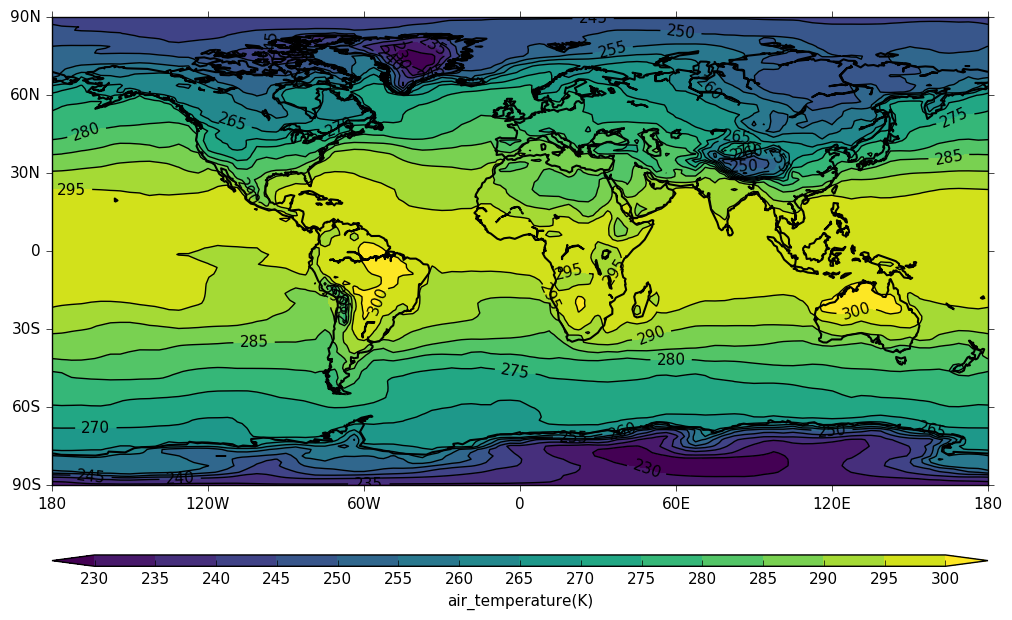

In [39]:
%matplotlib inline
import cfplot as cfp
cfp.con(g)

#### `T` is shorthand for *time*

In [41]:
print f.subspace(T=cf.ge(cf.dt('1967-2-18')))

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(33), latitude(145), longitude(192)) K
Cell methods   : time: mean (interval: 30 minutes)
Axes           : height(1) = [2.0] m
               : time(33) = [1967-03-16T12:00:00Z, ..., 1969-11-16T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east



In [43]:
print f.subspace(T=cf.month(4))

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(10), latitude(145), longitude(192)) K
Cell methods   : time: mean (interval: 30 minutes)
Axes           : height(1) = [2.0] m
               : time(10) = [1960-04-16T00:00:00Z, ..., 1969-04-16T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east



In [44]:
print f.subspace(time=cf.dt('1965-11-16'), Y=cf.gt(30))

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(1), latitude(48), longitude(192)) K
Cell methods   : time: mean (interval: 30 minutes)
Axes           : height(1) = [2.0] m
               : time(1) = [1965-11-16T00:00:00Z] 365_day
               : latitude(48) = [31.25, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east



# 3. The field's data

In [ ]:
f.data

#### Get the data as a `numpy` array

In [ ]:
f.array # This is numpy array

In [ ]:
print type(f.array)
f.array[-1, 2, -3]

In [ ]:
f.subspace[-1, 2, -3].array

In [ ]:
x = f.copy()
x.subspace[-1, 2, -3] = -999
x.subspace[-1, 2, -3].array

In [ ]:
x.subspace[-1, ...] = 888
x.subspace[-1, ...].array

In [ ]:
x.subspace[0, ...] = x.subspace[-1, ...] - 111
x.subspace[0, ...].array

### Modify the data where a condition is met
https://cfpython.bitbucket.io/docs/latest/generated/cf.Field.where.html

In [ ]:
f.min(), f.mean(), f.max()

#### Set values below 290 to missing data

In [ ]:
x = f.where(cf.lt(290), cf.masked)
print x.min(), x.mean(), x.max()
cfp.con(x.subspace[0])

### Manipulate the axes

In [ ]:
f.transpose(['X', 'T', 'Y'])

### Modifying the units

In [103]:
f = cf.read_field('ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc')
f.units, f.mean()

('K', <CF Data: 276.584738291 K>)

In [116]:
f.units = 'degC'
f.units, f.mean()

('degC', <CF Data: 3.43473829149 degC>)

In [117]:
f.Units # Upper case "U" gives a units object that we can manipulate

<CF Units: degC>

In [118]:
f.Units += 273.15
f.Units, f.units, f.mean()

(<CF Units: K>, 'K', <CF Data: 276.584738291 K>)

### Field arithmetic

In [94]:
f

<CF Field: air_temperature(time(120), latitude(145), longitude(192)) K>

In [ ]:
f.min(), f.mean(), f.max()

In [ ]:
g = f + 2
g

In [ ]:
g.min(), g.mean(), g.max()

In [ ]:
g = f - f
g

In [ ]:
g.min(), g.mean(), g.max()

In [ ]:
x = f.copy()
x.units = 'degC'
x.data

#### Subtract the celcius field from the Kelvin field and check that the result is zero 

In [119]:
(f - x).mean()

<CF Data: 0.0 K>

In [124]:
g = f * f
g

<CF Field: (time(120), latitude(145), longitude(192)) K2>

#### Find the anomalies relative to the first time

In [127]:
first_time = f.subspace[0]
first_time = first_time.transpose(['Y', 'T', 'X'])
first_time

<CF Field: air_temperature(latitude(145), time(1), longitude(192)) K>

In [130]:
g = f - first_time
g

<CF Field: air_temperature(time(120), latitude(145), longitude(192)) K>

In [131]:
g.min(), g.mean(), g.max()

(<CF Data: -32.6200714111 K>,
 <CF Data: 1.44168717443 K>,
 <CF Data: 53.5055999756 K>)

# 4. Statistical operations
https://cfpython.bitbucket.io/docs/latest/generated/cf.Field.collapse.html

In [132]:
g = f.collapse('max')
g

<CF Field: air_temperature(time(1), latitude(1), longitude(1)) K>

In [133]:
g.data

<CF Data: [[[311.895974978]]] K>

In [134]:
g = f.collapse('T: mean')
print g
print 'data values:\n', g.data
print '\ntime bounds:\n', g.coord('T').bounds.dtarray

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(1), latitude(145), longitude(192)) K
Cell methods   : time: mean (interval: 30 minutes) time: mean
Axes           : height(1) = [2.0] m
               : time(1) = [1964-12-01T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east

data values:
[[[227.63307279, ..., 254.509607188]]] K

time bounds:
[[<CF Datetime: 1959-12-01T00:00:00Z 365_day>
  <CF Datetime: 1969-12-01T00:00:00Z 365_day>]]


#### Collapse multiple axes simultaneously

In [139]:
g = f.collapse('X: Y: sd')
g.data

<CF Data: [[[19.4089697196, ..., 20.3799986321]]] K>

#### Collapse an axis into groups, rather than a single value

In [141]:
g = f.collapse('T: mean', group=cf.seasons())
print g

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(40), latitude(145), longitude(192)) K
Cell methods   : time: mean (interval: 30 minutes) time: mean
Axes           : height(1) = [2.0] m
               : time(40) = [1960-01-15T00:00:00Z, ..., 1969-10-16T12:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east



#### `cf.seasons()` is a list of queries, each of which defines a range of months

In [142]:
cf.seasons()

[<CF Query: month[(ge 12) | (le 2)]>,
 <CF Query: month(wi (3, 5))>,
 <CF Query: month(wi (6, 8))>,
 <CF Query: month(wi (9, 11))>]

#### By default, collapses are NOT weighted

In [143]:
g = f.collapse('area: mean', weights='area') # Area mean for each time
g = g.collapse('T: max')                     # Time maxiumum of the area means
g.data
print g

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(1), latitude(1), longitude(1)) K
Cell methods   : time: mean (interval: 30 minutes) longitude: latitude: mean time: maximum
Axes           : height(1) = [2.0] m
               : time(1) = [1964-12-01T00:00:00Z] 365_day
               : latitude(1) = [0.0] degrees_north
               : longitude(1) = [179.0625] degrees_east



### File aggregation

#### Create a sequence of files on disk, each of which contains one year

In [148]:
f = cf.read_field('ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc')
print f
for i in range(10):
    g = f.subspace[12*i:12*(i+1)]
    year = str(g.coord('T').year.array[0])
    new_file = 'air_temperature_'+year+'.nc'
    cf.write(g, new_file)
    print '    ',new_file

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods   : time: mean (interval: 30 minutes)
Axes           : height(1) = [2.0] m
               : time(120) = [1959-12-16T12:00:00Z, ..., 1969-11-16T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east

     air_temperature_1959.nc
     air_temperature_1960.nc
     air_temperature_1961.nc
     air_temperature_1962.nc
     air_temperature_1963.nc
     air_temperature_1964.nc
     air_temperature_1965.nc
     air_temperature_1966.nc
     air_temperature_1967.nc
     air_temperature_1968.nc


#### In ipython `!` preceeeds a shell command

In [152]:
!ls -o air_temperature_*.nc

-rw-r--r-- 1 swsheaps 2725071 Mar 28 12:15 air_temperature_1959.nc
-rw-r--r-- 1 swsheaps 2725071 Mar 28 12:15 air_temperature_1960.nc
-rw-r--r-- 1 swsheaps 2725071 Mar 28 12:15 air_temperature_1961.nc
-rw-r--r-- 1 swsheaps 2725071 Mar 28 12:15 air_temperature_1962.nc
-rw-r--r-- 1 swsheaps 2725071 Mar 28 12:15 air_temperature_1963.nc
-rw-r--r-- 1 swsheaps 2725071 Mar 28 12:15 air_temperature_1964.nc
-rw-r--r-- 1 swsheaps 2725071 Mar 28 12:15 air_temperature_1965.nc
-rw-r--r-- 1 swsheaps 2725071 Mar 28 12:15 air_temperature_1966.nc
-rw-r--r-- 1 swsheaps 2725071 Mar 28 12:15 air_temperature_1967.nc
-rw-r--r-- 1 swsheaps 2725071 Mar 28 12:15 air_temperature_1968.nc


In [153]:
f2 = cf.read('air_temperature_*.nc')
print f2

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods   : time: mean (interval: 30 minutes)
Axes           : height(1) = [2.0] m
               : time(120) = [1959-12-16T12:00:00Z, ..., 1969-11-16T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east



In [166]:
print f
f.equals(f2[0])

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods   : time: mean (interval: 30 minutes)
Axes           : height(1) = [2.0] m
               : time(120) = [1959-12-16T12:00:00Z, ..., 1969-11-16T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east



True

In [169]:
f3 = cf.read('air_temperature_*.nc', aggregate=False)
f3[0]

<CF Field: air_temperature(time(12), latitude(145), longitude(192)) K>

# 5. PP and UM files

In [171]:
x = cf.read('ncas_data/aaaaoa.pmh8dec.pp')
x

[<CF Field: long_name:CANOPY THROUGHFALL RATE      KG/M2/S(grid_latitude(30), grid_longitude(24)) kg m-2 s-1>,
 <CF Field: relative_humidity(air_pressure(17), grid_latitude(30), grid_longitude(24)) %>,
 <CF Field: relative_humidity(grid_latitude(30), grid_longitude(24)) %>]

In [172]:
cf.write(x, 'aaaaoa.pmh8dec.nc')

In [174]:
cf.read('aaaaoa.pmh8dec.nc')

[<CF Field: long_name:CANOPY THROUGHFALL RATE      KG/M2/S(grid_latitude(30), grid_longitude(24)) kg m-2 s-1>,
 <CF Field: relative_humidity(air_pressure(17), grid_latitude(30), grid_longitude(24)) %>,
 <CF Field: relative_humidity(grid_latitude(30), grid_longitude(24)) %>]